<a href="https://colab.research.google.com/github/CheesyPitsa/Lab2.3/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

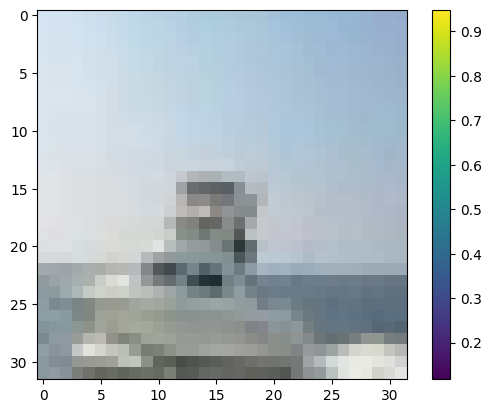

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras import utils


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [ ]:
model.compile(
              optimizer='Nadam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/10
625/625 [==============================] - 484s 770ms/step - loss: 0.0644 - accuracy: 0.4805 - val_loss: 0.0498 - val_accuracy: 0.6273
Epoch 2/10
625/625 [==============================] - 480s 769ms/step - loss: 0.0440 - accuracy: 0.6741 - val_loss: 0.0422 - val_accuracy: 0.6881
Epoch 3/10
625/625 [==============================] - 476s 761ms/step - loss: 0.0354 - accuracy: 0.7462 - val_loss: 0.0371 - val_accuracy: 0.7298
Epoch 4/10
625/625 [==============================] - 476s 763ms/step - loss: 0.0301 - accuracy: 0.7875 - val_loss: 0.0326 - val_accuracy: 0.7681
Epoch 5/10
625/625 [==============================] - 477s 763ms/step - loss: 0.0255 - accuracy: 0.8241 - val_loss: 0.0355 - val_accuracy: 0.7449
Epoch 6/10
625/625 [==============================] - 481s 770ms/step - loss: 0.0219 - accuracy: 0.8490 - val_loss: 0.0325 - val_accuracy: 0.7731
Epoch 7/10
625/625 [==============================] - 464s 742ms/step - loss: 0.0190 - accuracy: 0.8711 - val_loss: 0.0335 -

In [ ]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 145s 93ms/step


Text(0.5, 0, '[8]')

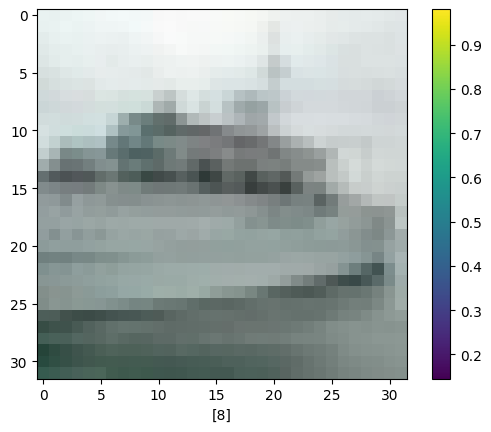

In [ ]:
predictions[80]

np.argmax(predictions[80])
y_test[80]

plt.figure()
plt.imshow(x_test[80])
plt.colorbar()
plt.grid(False)

plt.xlabel(y_test[80])